visualize variance explained at each step and the learnt partition

---

In [18]:
import utils
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import colors as mc
%matplotlib inline

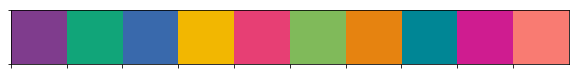

In [19]:
color_list = utils.palettable.cartocolors.qualitative.Bold_10.mpl_colors
sns.palplot(color_list)

In [20]:
'; '.join(utils.palettable.cartocolors.qualitative.Bold_10.hex_colors)

'#7F3C8D; #11A579; #3969AC; #F2B701; #E73F74; #80BA5A; #E68310; #008695; #CF1C90; #F97B72'

In [21]:
purple_color = '#A575B0'
my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#ffffff', purple_color], N=30)

In [112]:
color_index = 0
my_color = color_list[color_index]
#freq_cmap = mc.LinearSegmentedColormap.from_list('freq_cmap', ['#EDEDED', my_color], N=30)
freq_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#B491BB', '#666666'], N=30)

In [113]:
orange_color = '#E6830F'
color_index = 6
my_orange_color = color_list[color_index]
my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#95C8D8', '#666666'], N=30)
#my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#3969AC', 'gray', '#F97B72'], N=30)

---

#### stackoverflow (subset)

##### feature importance

In [76]:
#ylab_list = ['Signup Duration', 'Signup Percentile', 'Reputation',
#             '# of Ans. Before', 'Code Lines', 'Words', 'URLs',
#             'Time Since Prev. Ans.', 'Ans. Position', 'Session Len.',
#             'Readability', 'Images',
#            ]

In [77]:
ylab_list = ['# of Ans. Before', 'Reputation', 'Signup Duration',
             'Signup Percentile', 'Code Lines', 'Words', 'Session Len.',
             'Time Since Prev. Ans.', 'URLs', 'Ans. Position',
             'Readability', 'Images',
            ]

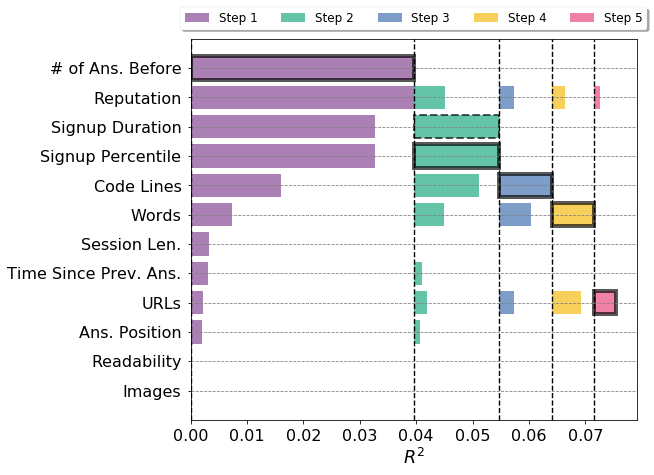

In [78]:
data_name = 'stackoverflow_cleaned_subset'
#split_version = 1
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 7), 
                                    color_list=color_list, bar_alpha=0.65)
mapping = dict(zip([t.get_text() for t in ax.get_yticklabels()[::-1]], ylab_list))
_ = ax.set_yticklabels(ylab_list[::-1])

In [79]:
feature_list = ['# of Ans. Before', 'Signup Percentile', 'Code Lines', 'Word']
feature_list

['# of Ans. Before', 'Signup Percentile', 'Code Lines', 'Word']

##### feature network

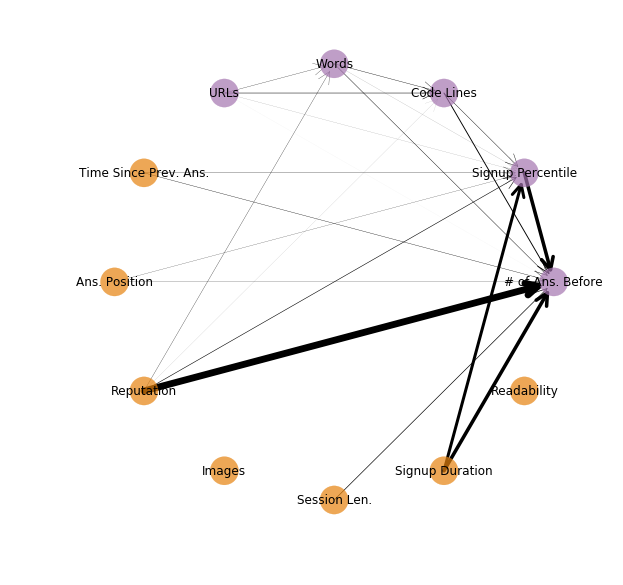

In [80]:
net, (fig, ax) = utils.visualize_feature_network(model_folder=model_folder, w_scale=200, arrowsize=30,
                                                 node_kwargs={'alpha': 0.7}, label_kwargs={'labels': mapping},
                                                 color_choice=dict(zip(['selected', 'unselected', 'isolated'], 
                                                                       [purple_color, orange_color, 'k'])))
                                                                       #color_list[:3])))
xmin, xmax = ax.get_xlim()
ax.set_xlim([xmin*1.05, xmax*1.05])
ymin, ymax = ax.get_ylim()
_ = ax.set_ylim([ymin*1.03, ymax*1.03])

##### distribution

###### 1d

In [81]:
dim = 1
#thres = 0.179732
thres = 0.5
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0]]

In [82]:
splits_at_dim[0][0] = 0.1
splits_at_dim

[[0.1, 53.0, 546.0, 3587.0, 11033.0, 22330.0]]

In [83]:
chosen_f_dim

array(['number_of_ans_wrote_by_user_before_this'], dtype=object)

[Text(0,0,'15'), Text(0,0,'25'), Text(0,0,'35')]

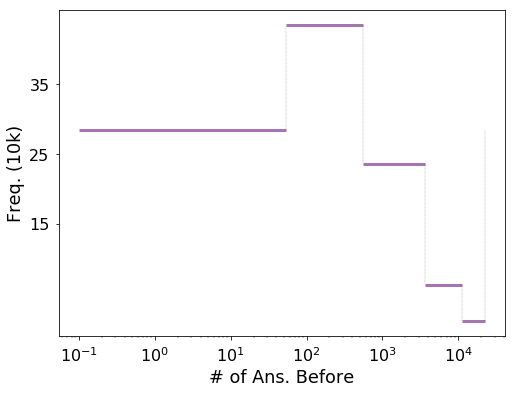

In [84]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, N_dim, 
                                       xlab=chosen_f_dim[0], 
                                       #ylab=r'$Freq.$',
                                       ylab='Freq. (10k)',
                                       #xscale='linear', yscale='linear',
                                       yscale='linear',
                                       #hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                       hlines_kwargs={'color': purple_color, 'linewidth': 3}
                                      )
ax.set_xlabel(feature_list[0])
ax.set_yticks([int(i*1e4) for i in [15, 25, 35]])
ax.set_yticklabels([15, 25, 35])
#fig.canvas.draw()

Text(0.5,0,'# of Ans. Before')

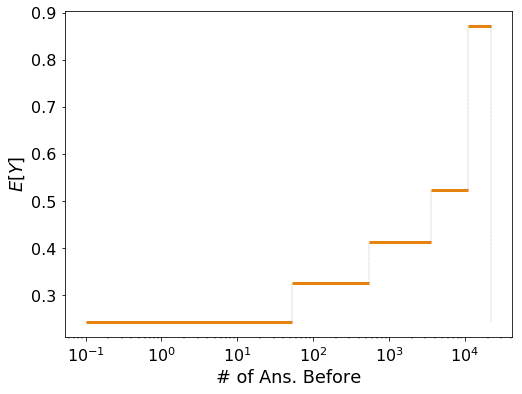

In [85]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, intensity_dim, 
                                       xlab=chosen_f_dim[0], ylab=r'$E[Y]$',
                                       #xscale='linear', yscale='linear',
                                       xscale='log', yscale='linear',
                                       hlines_kwargs={'color': orange_color, 'linewidth': 3}
                                      )
ax.set_xlabel(feature_list[0])

###### 2d

In [86]:
dim = 2
thres = 0.5
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
chosen_f_dim

array(['number_of_ans_wrote_by_user_before_this', 'percentile'], dtype=object)

In [87]:
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [-7.49574e-08, 0.323457, 0.564794, 0.762954, 0.972459, 1.0]]

In [88]:
splits_at_dim[0][0] = 0.1
splits_at_dim[1][0] = 0
#splits_at_dim[1][1] = 0.1
splits_at_dim

[[0.1, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [0, 0.323457, 0.564794, 0.762954, 0.972459, 1.0]]

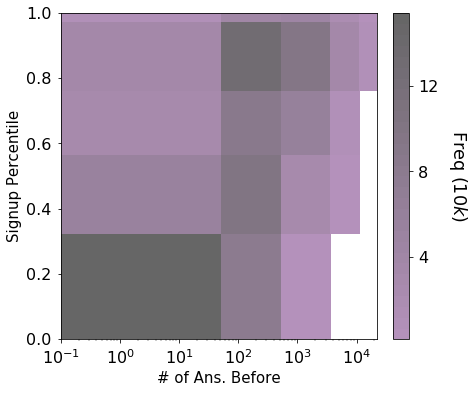

In [114]:
cbar_ticks = (pd.np.array([4, 8, 12])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap,#my_cmap,
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            unit_w=7, unit_h=6,
                                            #xscale='linear', 
                                            yscale='linear',
                                            cb_kwargs={'ticks': cbar_ticks},
                                           )
cb.set_ticklabels(cbar_ticks//(10000))
#_ = ax_arr[0,0].set_xticks(pd.np.round(splits_at_dim[0], 2))
#ax_arr[0,0].set_xticklabels(pd.np.round(splits_at_dim[0], 3), fontdict={'size': 12})

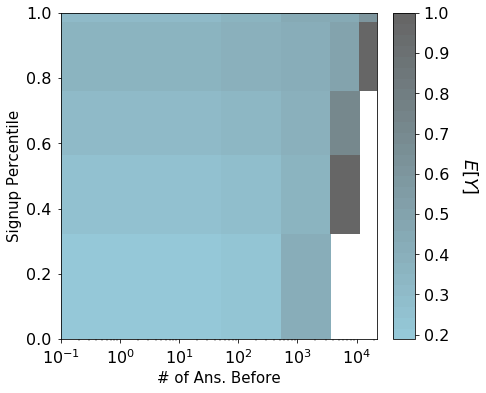

In [115]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, #'coolwarm', 
                                            my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=7, unit_h=6,
                                            #xscale='linear',
                                            yscale='linear',
                                           )

###### 3d

In [39]:
dim = 3
#thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [40]:
chosen_f_dim

array(['number_of_ans_wrote_by_user_before_this', 'percentile',
       'code_lines'], dtype=object)

In [41]:
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [-7.49574e-08, 0.323457, 0.564794, 0.762954, 0.972459, 1.0],
 [0.0, 0.0, 1037.0]]

In [42]:
#splits_at_dim[0][0] = 0.1
## percentile
splits_at_dim[1][0] = 0
## code lines
splits_at_dim[2][0] = 0.01
splits_at_dim[2][1] = 0.1
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [0, 0.323457, 0.564794, 0.762954, 0.972459, 1.0],
 [0.01, 0.1, 1037.0]]

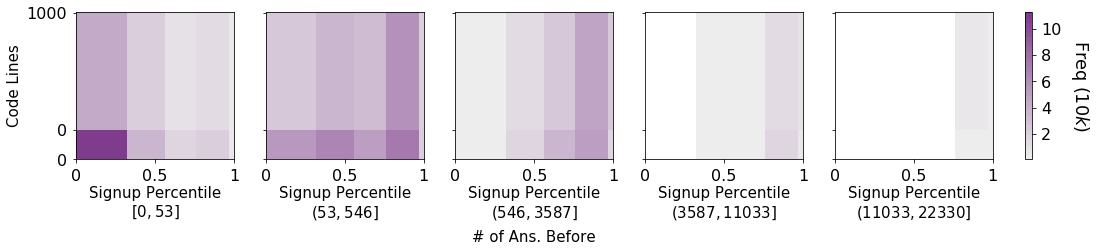

In [43]:
cbar_ticks = (pd.np.array([2, 4, 6, 8, 10])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap,#my_cmap,
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            unit_w=4, unit_h=2.7,
                                            xscale='linear',
                                            xbins_lab_decimal=0, #norm_func=mc.LogNorm,
                                            xlab_x=0.4, xlab_y=-0.3, ylab_x=-0.08,
                                            cb_kwargs={'ticks': cbar_ticks},
                                           )
cb.set_ticklabels(cbar_ticks//(10000))
for ax in ax_arr.flat:
    ax.set_xticklabels([0, 0.5, 1])
    ax.set_yticks([0.01, 0.1, 1000])
    ax.set_yticklabels([0, 0, 1000])

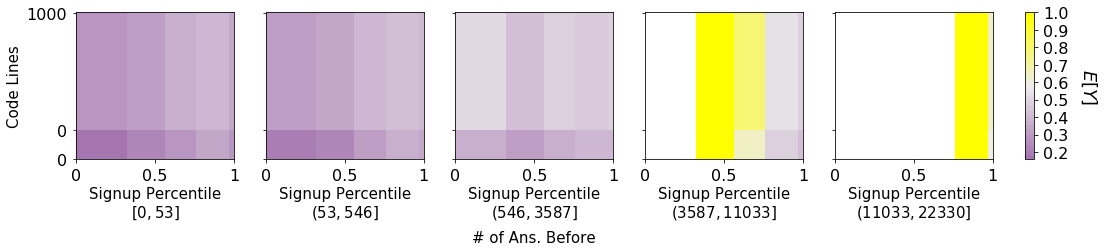

In [44]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap,
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=4, unit_h=2.7,
                                            xscale='linear',
                                            xbins_lab_decimal=0,
                                            xlab_x=0.4, xlab_y=-0.3, ylab_x=-0.08,
                                           )
for ax in ax_arr.flat:
    ax.set_xticklabels([0, 0.5, 1])
    ax.set_yticks([0.01, 0.1, 1000])
    ax.set_yticklabels([0, 0, 1000])
#cb.set_ticks([0.1, 0.2, 0.3, 0.4, 0.5])

###### 4d

In [45]:
dim = 4
#thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
chosen_f_dim

array(['number_of_ans_wrote_by_user_before_this', 'percentile',
       'code_lines', 'words'], dtype=object)

In [46]:
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [-7.49574e-08, 0.323457, 0.564794, 0.762954, 0.972459, 1.0],
 [0.0, 0.0, 1037.0],
 [0.0, 42.0, 85.0, 178.0, 3696.0]]

In [47]:
##
splits_at_dim[1][0] = 0
## 
splits_at_dim[2][0] = 0.01
splits_at_dim[2][1] = 0.1
## 
splits_at_dim[3][0] = 0.1
##
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [0, 0.323457, 0.564794, 0.762954, 0.972459, 1.0],
 [0.01, 0.1, 1037.0],
 [0.1, 42.0, 85.0, 178.0, 3696.0]]

"\nfor ax in ax_arr.flat:\n    ax.set_ylabel('')\n    ax.set_yticklabels([])\n    ax.set_xticks([1, 10, 100, 1000])\n_ = fig.texts[1].set_visible(False)\n"

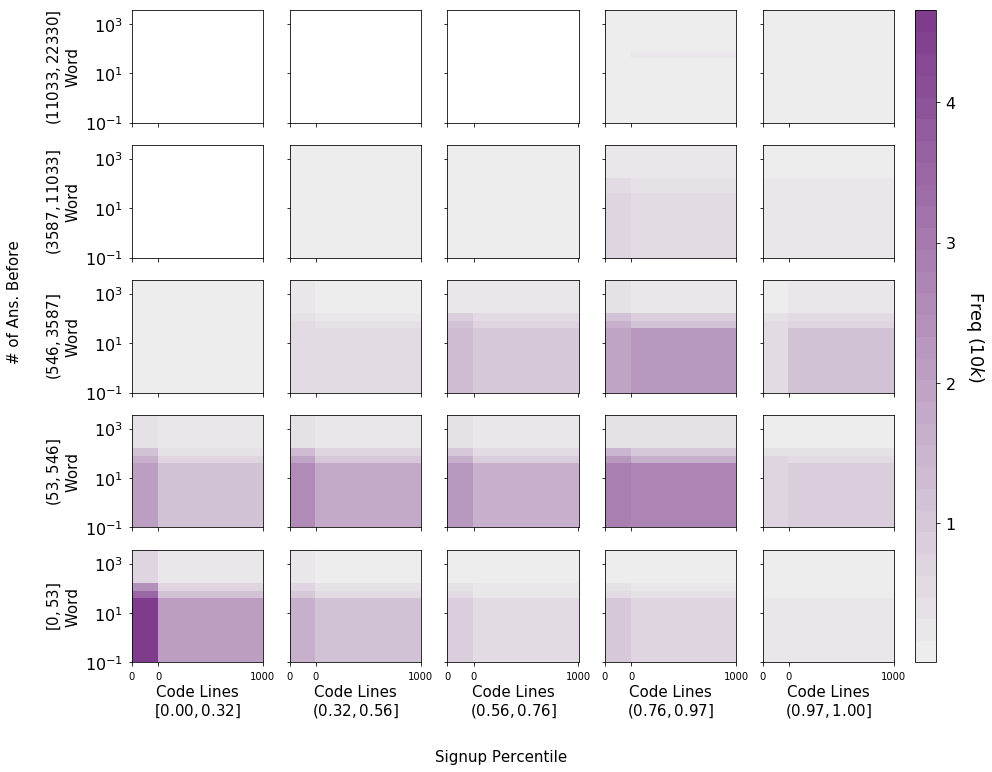

In [48]:
cbar_ticks = (pd.np.array([1,2,3,4])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap, 
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            #xscale='symlog',
                                            xbins_lab_decimal=2, ybins_lab_decimal=0,
                                            ylab_x=0.02,
                                            cb_kwargs={'ticks': cbar_ticks, 'aspect': 30},
                                           )
cb.set_ticklabels(cbar_ticks//(10000))
for ax in ax_arr.flat:
    #ax.set_ylabel('')
    #ax.set_yticklabels([])
    #ax.set_xticks([0.01, 1, 100])
    ax.set_xticks([0.01, 0.1, 1000])
    #ax.set_xticklabels([0.01, 0.1, 1000], fontsize=0)
    ax.set_xticklabels([0, 0, 1000], fontsize=10)
'''
for ax in ax_arr.flat:
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.set_xticks([1, 10, 100, 1000])
_ = fig.texts[1].set_visible(False)
'''

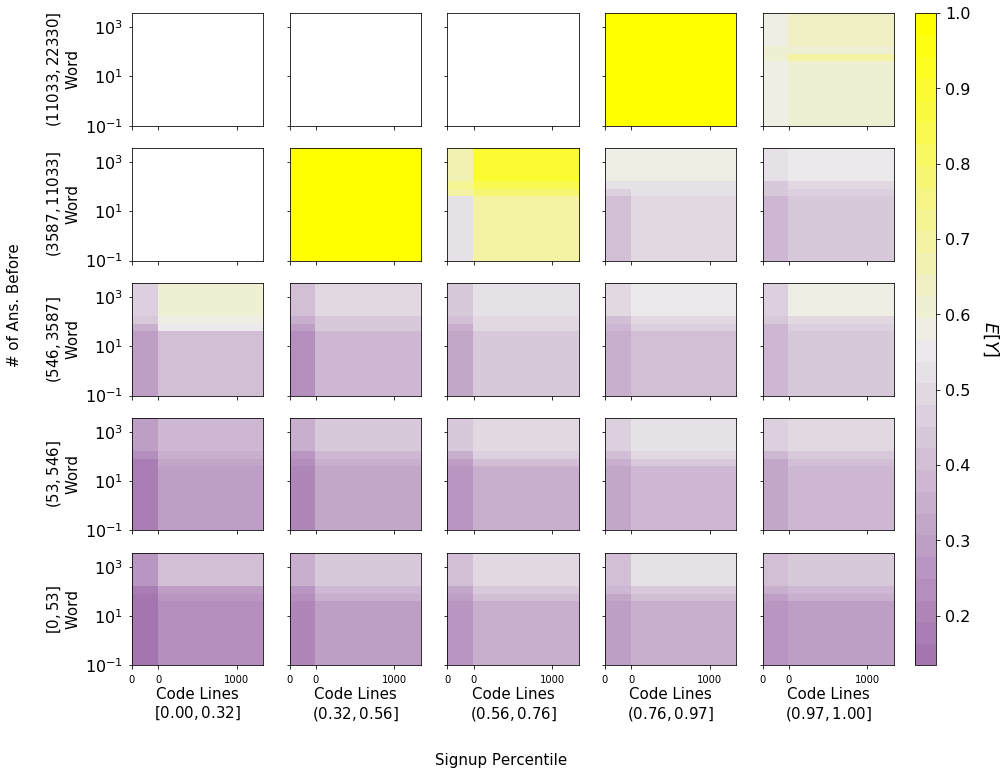

In [49]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            xbins_lab_decimal=2, ybins_lab_decimal=0,
                                            ylab_x=0.02,
                                            cb_kwargs={'aspect': 30},
                                           )
for ax in ax_arr.flat:
    #ax.set_ylabel('')
    #ax.set_yticklabels([])
    ax.set_xticks([0.01, .1, 100])
    ax.set_xticklabels([0, 0, 1000], fontsize=10)
    
#_ = fig.texts[1].set_visible(False)

---

#### digg

##### feature importance

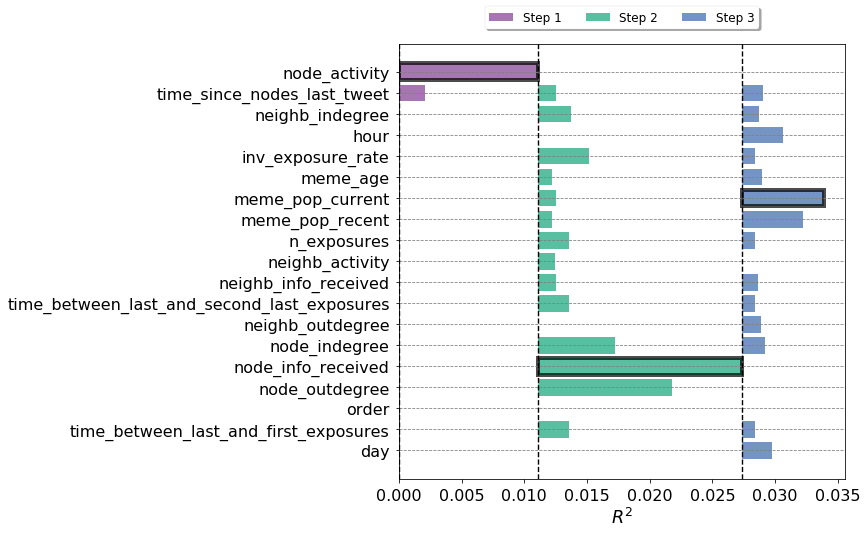

In [50]:
data_name = 'digg'
#split_version = 4
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)

In [51]:
feature_list = ['User Activity', 'Info Received', 'Meme Pop. (Current)']

##### feature network

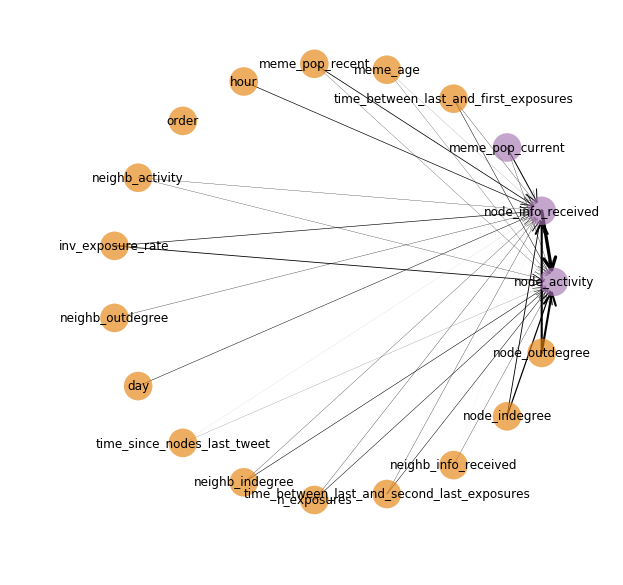

In [52]:
net, (fig, ax) = utils.visualize_feature_network(model_folder=model_folder, w_scale=200, arrowsize=30,
                                                 node_kwargs={'alpha': 0.65}, #label_kwargs={'labels': mapping},
                                                 color_choice=dict(zip(['selected', 'unselected', 'isolated'], 
                                                                       #color_list[:3])))
                                                                       [purple_color, orange_color, 'k'])))
xmin, xmax = ax.get_xlim()
ax.set_xlim([xmin*1.05, xmax*1.05])
ymin, ymax = ax.get_ylim()
_ = ax.set_ylim([ymin*1.03, ymax*1.03])

##### distribution

###### 1d

In [53]:
dim = 1
#thres = 0.179732
thres = 0.5
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

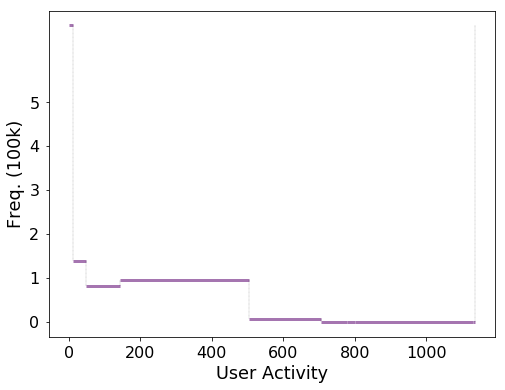

In [54]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, N_dim, 
                                       xlab=feature_list[0], 
                                       ylab='Freq. (100k)',
                                       xscale='linear', yscale='linear',
                                       #hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                       hlines_kwargs={'color': purple_color, 'linewidth': 3}
                                      )
#ax.set_xlabel('Signup Percentile')
ax.set_yticks([int(i*1e5) for i in range(6)])
_ = ax.set_yticklabels(pd.np.arange(6))

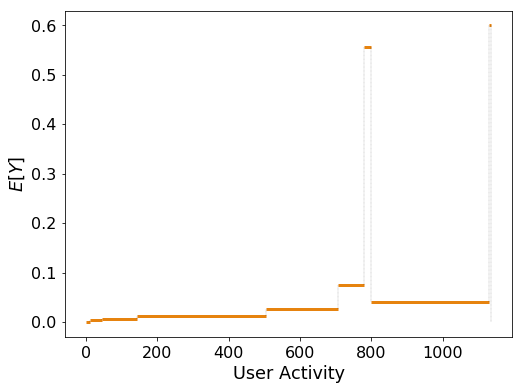

In [55]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, intensity_dim, 
                                       xlab=feature_list[0], ylab=r'$E[Y]$',
                                       xscale='linear', yscale='linear',
                                       hlines_kwargs={'color': orange_color, 'linewidth': 3}
                                      )

###### 2d

In [56]:
dim = 2
thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [57]:
splits_at_dim

[[0.0, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.0, 101.0, 1371.0, 10093.0, 126022.0]]

In [58]:
splits_at_dim[0][0] = 0.1
splits_at_dim[1][0] = 0.1

In [59]:
splits_at_dim

[[0.1, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.1, 101.0, 1371.0, 10093.0, 126022.0]]

In [60]:
cb_ticks = pd.np.array([1, 2, 3])*(10**5)
cb_kwargs ={'aspect': 15, 'ticks': cb_ticks}

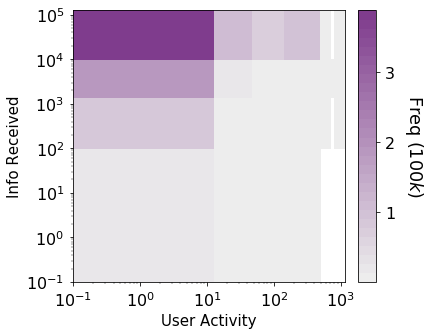

In [61]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap, 
                                            N_dim, 'Freq ($100k$)', feature_list,
                                            unit_w=6, unit_h=5,
                                            #yscale='log', xscale='linear',
                                            cb_kwargs=cb_kwargs,
                                           )
ax_arr[0,0].set_xlim(.1, 1136)
ax_arr[0,0].set_ylim(.1, 126022.0)
cb.set_ticklabels(cb_ticks//(10**5))
#fig.texts[0].set_visible(False)

In [62]:
cb_kwargs ={'aspect': 15, 'ticks': [0.1, 0.3, 0.5 , .7, .9]}

/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(1, 100000)

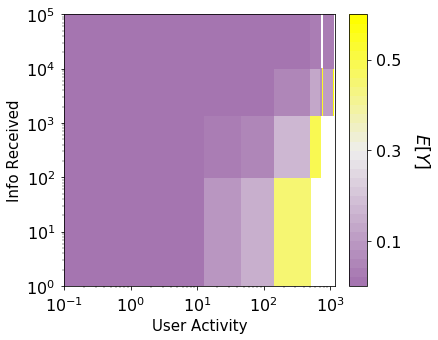

In [63]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=6, unit_h=5,
                                            xbins_lab_decimal=0,
                                            #yscale='log', xscale='linear',
                                            cb_kwargs=cb_kwargs,
                                           )
ax_arr[0,0].set_xlim(0, 1200)
ax_arr[0,0].set_ylim(1, 10**5)
#for ax in ax_arr.flat:
#    ax.set_ylabel('')
#    ax.set_yticklabels([])

###### 3d

In [64]:
dim = 3
thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [65]:
chosen_f_dim

array(['node_activity', 'node_info_received', 'meme_pop_current'], dtype=object)

In [66]:
splits_at_dim

[[0.0, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.0, 101.0, 1371.0, 10093.0, 126022.0],
 [0.0, 1.0, 11.0, 69.0, 102.0, 474.0, 8479.0]]

In [67]:
splits_at_dim[0][0] = 0.1
splits_at_dim[1][0] = 0.1
splits_at_dim[2][0] = 0.1

In [68]:
splits_at_dim

[[0.1, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.1, 101.0, 1371.0, 10093.0, 126022.0],
 [0.1, 1.0, 11.0, 69.0, 102.0, 474.0, 8479.0]]

In [69]:
cb_ticks = pd.np.arange(2,11,2)*(10**4)
cb_kwargs ={'aspect': 15, 'ticks': cb_ticks}

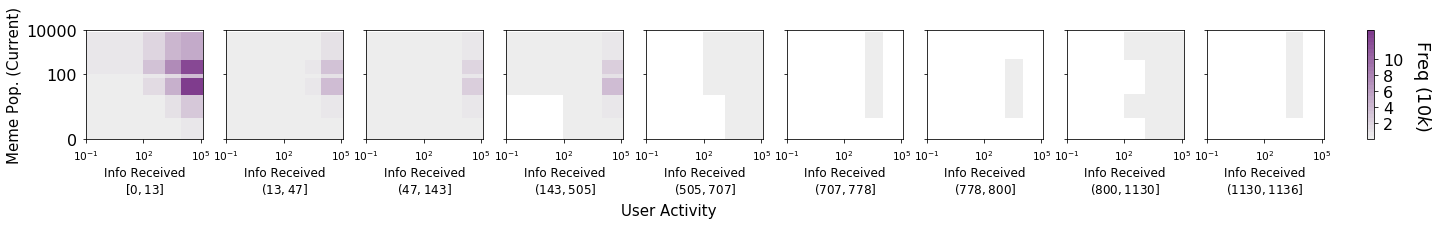

In [70]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap, 
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            unit_w=3, unit_h=2,
                                            xbins_lab_decimal=0,
                                            xlab_x=0.40, #xlab_y=-0.15,
                                            cb_kwargs=cb_kwargs,
                                           )
                      
fig.canvas.draw()
for ax in ax_arr.flat:
    ax.set_yticks([0.1, 100, 10000])
    ax.set_yticklabels([0, 100, 10000])
    ax.set_xticklabels(ax.get_xticklabels(), fontdict={'size': 10.5})
    ax.set_xlabel(ax.get_xlabel(), fontdict={'size': 12})
cb.set_ticklabels(cb_ticks//(10**4))

/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/matplotlib/colorbar.py:427: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


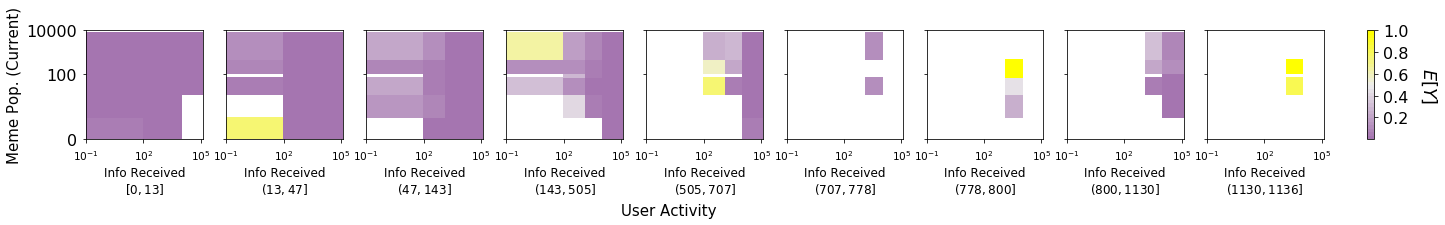

In [71]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=3, unit_h=2,
                                            xbins_lab_decimal=0,
                                            xlab_x=0.40, #xlab_y=-0.15,
                                           )
'''
for ax in ax_arr.flat:
    ax.set_xlabel('')
    ax.set_xticklabels([])
fig.texts[0].set_visible(False)
'''
fig.canvas.draw()
for ax in ax_arr.flat:
    ax.set_yticks([0.1, 100, 10000])
    ax.set_yticklabels([0, 100, 10000])
    ax.set_xticklabels(ax.get_xticklabels(), fontdict={'size': 10.5})
    ax.set_xlabel(ax.get_xlabel(), fontdict={'size': 12})
cb.set_ticklabels(cb_ticks//(10**4))

---

#### khan

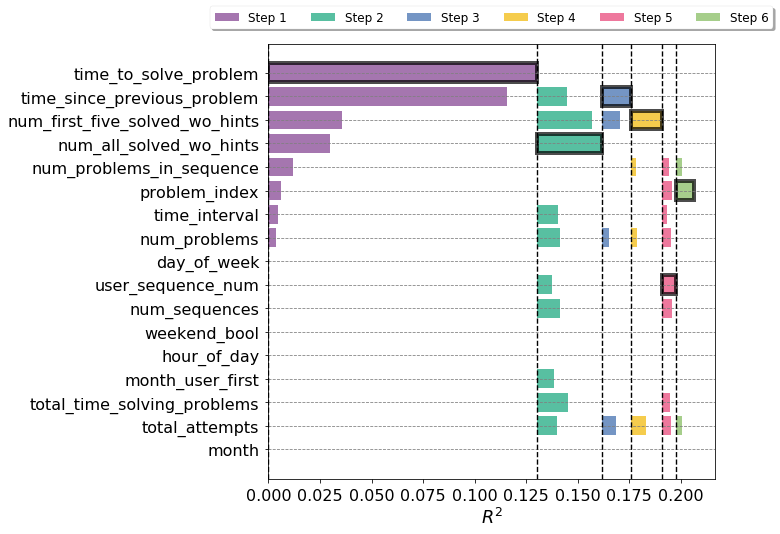

In [72]:
data_name = 'khan_cleaned'
#split_version = 3
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)

---

#### duolingo

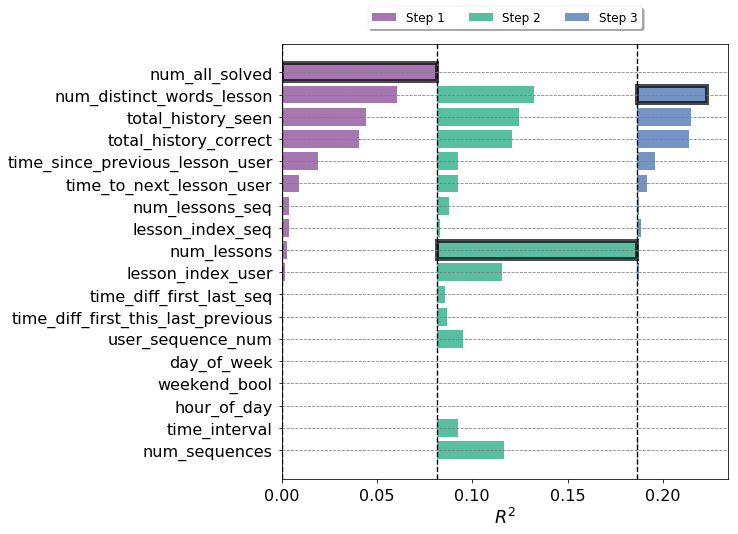

In [73]:
data_name = 'duolingo_cleaned'
#split_version = 4
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)

---

#### twitter

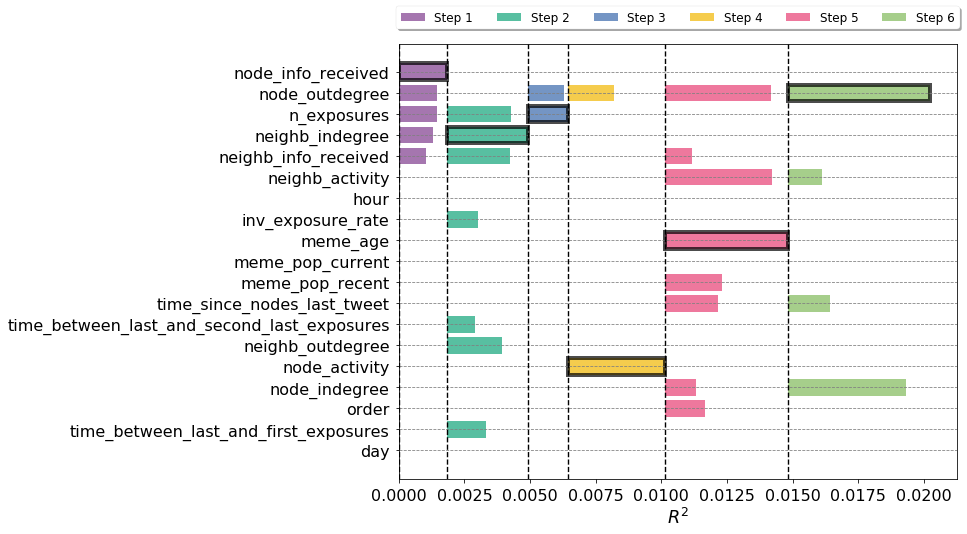

In [74]:
data_name = 'twitter'
#split_version = 4
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(10, 8), 
                                    color_list=color_list, bar_alpha=0.7)